# TensorFlow Classification 

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

## Load MINST Data

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Have a look at the data
- See how many images we have

In [3]:
print( "Train data contains {} images.".format(mnist.train.num_examples) )
print( "Test  data contains {} images.".format(mnist.test.num_examples) )
print( "Eval  data contains {} images.".format(mnist.validation.num_examples) )

Train data contains 55000 images.
Test  data contains 10000 images.
Eval  data contains 5000 images.


- See some picture

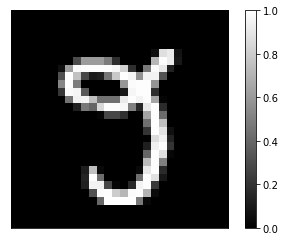

In [4]:
image = np.array( mnist.train.next_batch(1)[0] ).reshape(28, 28)
plt.imshow(image, cmap="gray", interpolation="nearest", origin="lower")
plt.xticks(())
plt.yticks(())
plt.colorbar()
plt.show()

## Define add layer function

In [5]:
def add_layer(inputs, in_dim, out_dim, activation_function=None):
    Weight = tf.Variable( tf.random_normal( shape=(in_dim, out_dim)), dtype=tf.float32, name="W")
    biases = tf.Variable( tf.zeros( shape=(out_dim) ) + 0.1,          dtype=tf.float32, name="b")
    Wx_plus_b = tf.matmul(inputs, Weight) + biases
    if activation_function == None:
        output = Wx_plus_b
    else:
        output = activation_function(Wx_plus_b)
    return output

## Define placeholder for the network

In [6]:
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

## Build the network model

In [7]:
prediction = add_layer(xs, 784, 10, activation_function=tf.nn.softmax)

## Define train step

In [8]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), reduction_indices=[1])) # loss
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

## Accuracy

In [9]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

## Train the model

In [10]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for i in range(2000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
        if i % 50 == 0:
            print(compute_accuracy(
                mnist.test.images, mnist.test.labels))

0.0634
0.601
0.7239
0.7745
0.7977
0.815
0.8217
0.8299
0.8398
0.8479
0.8529
0.8547
0.8605
0.8608
0.8605
0.8667
0.8676
0.8718
0.8725
0.874
0.8737
0.8785
0.8801
0.8798
0.8814
0.881
0.8784
0.8826
0.098
0.098
0.098
0.098
0.098
0.098
0.098
0.098
0.098
0.098
0.098
0.098
